<a href="https://colab.research.google.com/github/Chuwei-Chen/SIMM61-LabReports/blob/main/Assignment2/Assignment2_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Computer Vision Analysis of "Memotion": Internet Memes**

*   Name:Chuwei Chen
*   Course: SIMM71
*   Date: 12/02/2023
*   Environment: Google Colab
* Github link:https://github.com/Chuwei-Chen/SIMM71/tree/main/Assignment2


#Introduction


##Background
"Internet memes" is commonly refer to the propagation of content such as jokes, humor, viral images and videos on the internet(Shifman, 2013). The rapid production, consumption, and dissemination of internet memes among users plays a significant role in understanding digital culture and the essence of Web 2.0. In the social science context, most efforts of memes studies focus on semiotics and visual analysis of memes within specific domains, while in computer science, the emphasis is placed on large-scale classification and identification(Courtois & Frissen, 2022). The computer-aided analytical methods for image data can utilize computer vision algorithms(Szeliski, 2022). The initiative of this project aims to integrate computer vision technology and internet memes as a starting point, which explores the possible research practice in digital culture.

##Dataset and Methodology
The dataset in this project is sampled from the main dataset "Memotion Dataset 7k" from Kaggle(https://www.kaggle.com/datasets/williamscott701/memotion-dataset-7k). "Memotion Dataset" contains 7000 internet memes aims to detect the emotions of memes. Each meme was annotated with tags of sentiment, and type of humor, sarcastic, humorous, or offensive(Williams et al., 2021).

This project filters the memes according to the sentiment category and sampled 30 memes from each category, namely negative, neutral and positive. The target of this project is to perform exploratory and descriptive analysis across different memes sentiments.

The project will perform text detection to extract the text content in each meme. This is because memes are usually created by adding texts on a certain images. Secondly, the project apply object detection models and visualize the object components in each memes category.

# Libraies Loading

In [1]:
!pip install -q opencv-python
import numpy as np
from skimage import data
import cv2

# Dataset import

I have reclassifed the sentiment categories, merging "positive" and "very positive" into one label of "positive"; "negative" and "very negative" into one label of "negative". To obtain 30 sample memes from each category, I used the built-in random sampling tools in Excel and result in a total of 90 images.

In [2]:
# load the memes data from my github seperately(negative memes, neutral memes and positive memes)
import pandas as pd

column_name=['image_url'] #define the column name

#import negative memes data
neg_url = "https://raw.githubusercontent.com/Chuwei-Chen/SIMM71/main/Assignment2/dataset/negative/negative_memes.tsv"
neg_df = pd.read_csv(neg_url, sep="\t", header=None, names=column_name)


#import neutral memes data
neu_url = "https://raw.githubusercontent.com/Chuwei-Chen/SIMM71/main/Assignment2/dataset/neutral/neutral_memes.tsv"
neu_df = pd.read_csv(neu_url, sep="\t", header=None, names=column_name)


#import positive memes data
pos_url = "https://raw.githubusercontent.com/Chuwei-Chen/SIMM71/main/Assignment2/dataset/positive/positive_memes.tsv"
pos_df = pd.read_csv(pos_url, sep="\t", header=None, names=column_name)


In [3]:
neg_df.head(3)  #display negative memes urls

,image_url
0,https://raw.githubusercontent.com/Chuwei-Chen/...
1,https://raw.githubusercontent.com/Chuwei-Chen/...
2,https://raw.githubusercontent.com/Chuwei-Chen/...


In [4]:
neu_df.head(3)  #display neutral memes urls

,image_url
0,https://raw.githubusercontent.com/Chuwei-Chen/...
1,https://raw.githubusercontent.com/Chuwei-Chen/...
2,https://raw.githubusercontent.com/Chuwei-Chen/...


In [5]:
pos_df.head(3)  #display positive memes urls

,image_url
0,https://raw.githubusercontent.com/Chuwei-Chen/...
1,https://raw.githubusercontent.com/Chuwei-Chen/...
2,https://raw.githubusercontent.com/Chuwei-Chen/...


For the sake of subsequent analysis, I saved the image data locally in Google Colab in different files. The files can be found in the left bar of google colab notebook with the path of "/content/negative_memes" etc.

In [6]:
#save data from url to local
import os
import urllib.request

# Save negative memes
# Create a directory to save the images
if not os.path.exists("negative_memes"):
    os.makedirs("negative_memes")

# Loop over each row in the negative memes dataframe
for i, row in neg_df.iterrows():
    # retrieve the URL for the image
    url = row['image_url']
    
    # open the URL and retrieve the images
    import urllib.request
    response = urllib.request.urlopen(url)
    
    # Read the images into a variable
    img = response.read()
    
    # Write the contents to a local file
    with open("negative_memes/image_{}.jpg".format(i), "wb") as f:
        f.write(img)

In [45]:
#save neutral memes
if not os.path.exists("neutral_memes"):
    os.makedirs("neutral_memes")

for i, row in neu_df.iterrows():
    url = row['image_url']
    
    import urllib.request
    response = urllib.request.urlopen(url)
    
    img = response.read()
      
    with open("neutral_memes/image_{}.jpg".format(i), "wb") as f:
        f.write(img)

In [8]:
#save positive memes
if not os.path.exists("positive_memes"):
    os.makedirs("positive_memes")

for i, row in pos_df.iterrows():    
    url = row['image_url']    
    
    import urllib.request
    response = urllib.request.urlopen(url)    
    
    img = response.read()    
    
    with open("positive_memes/image_{}.jpg".format(i), "wb") as f:
        f.write(img)

# Text Extraction

Since each meme I collected from the dataset contains both textual and graphic elements, the project will first perform text extraction on each meme to evaluate the efficiency of the EasyOCR library.

In [9]:
#load libraries
from urllib.request import urlopen
from PIL import Image
import io

In [10]:
# install easyocr
!pip install -q easyocr
import easyocr

reader = easyocr.Reader(['en'])

# define a function to detect text in memes
def detect_text_in_image(url):
    # open the image
    image = Image.open(urlopen(url))
    
    # convert the image to a numpy array
    image = np.array(image)
    
    detected_text = reader.readtext(image)
    
    return detected_text


In [11]:
#Test on one image
result = reader.readtext('negative_memes/image_0.jpg')
result

[([[115, 3], [511, 3], [511, 39], [115, 39]],
  'BABE_YOU JUST DONT GET IT; DO YA?',
  0.6640799357446221)]

![](https://raw.githubusercontent.com/Chuwei-Chen/SIMM71/main/Assignment2/dataset/negative/image_1087.jpg)

It is clear that easyocr has successfully detected the texts in this particular meme "BABE_YOU JUST DONT GET IT; DO YA?".
The number 0.66 is the condifence score, indicating that the algorithm is moderately confident in the accuracy of the text detection. However, upon inspection of the image by eyes, it is clear that the result is almost correct.


##Text detection for the whole sample dataset

In [12]:
# apply the function to each row in the negative memes dataframe
neg_df['detected_text'] = neg_df['image_url'].apply(detect_text_in_image)

###this takes about 3 min

To improve the readability of results, it is necessary to delete the coordinates and confidence score in the output and retain the texts only.

In [13]:
# save the dataframe to a csv file, eliminate the numbers and keep the text only
import pandas as pd

# define a function to extract the text content
def extract_text(detected_text):
    text = ''.join(str(e) for e in detected_text)
    return ''.join(e for e in text if (e.isalpha() or e.isspace()))

# apply the function to the text column
neg_df['cleaned_text'] = neg_df['detected_text'].apply(extract_text)

# drop the original 'detected_text' column
neg_df.drop('detected_text', axis=1, inplace=True)

# write the cleaned dataframe to a CSV file
neg_df.to_csv("neg_text_detect.csv", index=False)
    
neg_df.head(5)

,image_url,cleaned_text
0,https://raw.githubusercontent.com/Chuwei-Chen/...,BABEYOU JUST DONT GET IT DO YA
1,https://raw.githubusercontent.com/Chuwei-Chen/...,Vex dont crash the bordler ...
2,https://raw.githubusercontent.com/Chuwei-Chen/...,WAIT YOURE HOW OLD HAPPY BIRTH...
3,https://raw.githubusercontent.com/Chuwei-Chen/...,MY SEXY GIRLFRIEND MAKES MESOO...
4,https://raw.githubusercontent.com/Chuwei-Chen/...,CONTRACT ON ME FROM BABY GODFA...


Although the resolutions of the meme images are usually low, the easyOCR algorithm has produced satisfactory results to extract the texts in memes. 

Now, I apply the same steps to process neutral memes dataset and positive memes dataset.

In [14]:
# apply the function to the neutral memes dataframe
neu_df['detected_text'] = neu_df['image_url'].apply(detect_text_in_image)

###this takes about 3 min 45s

,image_url,detected_text
0,https://raw.githubusercontent.com/Chuwei-Chen/...,"[([[1, 199], [704, 199], [704, 271], [1, 271]]..."
1,https://raw.githubusercontent.com/Chuwei-Chen/...,"[([[642, 206], [871, 206], [871, 298], [642, 2..."
2,https://raw.githubusercontent.com/Chuwei-Chen/...,"[([[23, 27], [482, 27], [482, 80], [23, 80]], ..."
3,https://raw.githubusercontent.com/Chuwei-Chen/...,"[([[10, 172], [190, 172], [190, 200], [10, 200..."
4,https://raw.githubusercontent.com/Chuwei-Chen/...,"[([[39, 461], [539, 461], [539, 545], [39, 545..."


In [16]:
# clean the detected text and keep the texts only
neu_df['cleaned_text'] = neu_df['detected_text'].apply(extract_text)

neu_df.drop('detected_text', axis=1, inplace=True)

neu_df.to_csv("neu_text_detect.csv", index=False)
    
neu_df.head(5)

,image_url,cleaned_text
0,https://raw.githubusercontent.com/Chuwei-Chen/...,Getting money with the same girl ...
1,https://raw.githubusercontent.com/Chuwei-Chen/...,Hagrid Not revealing H...
2,https://raw.githubusercontent.com/Chuwei-Chen/...,Remember Shangai Noon This is ...
3,https://raw.githubusercontent.com/Chuwei-Chen/...,o Wr Igidai Sellle
4,https://raw.githubusercontent.com/Chuwei-Chen/...,yup still fabulous L


In [17]:
# apply the function to the positive memes dataframe
pos_df['detected_text'] = pos_df['image_url'].apply(detect_text_in_image)

###this takes about 3 min 52s

In [18]:
# clean the detected text and keep the string only
pos_df['cleaned_text'] = pos_df['detected_text'].apply(extract_text)

pos_df.drop('detected_text', axis=1, inplace=True)

pos_df.to_csv("pos_text_detect.csv", index=False)
    
pos_df.head(5)

,image_url,cleaned_text
0,https://raw.githubusercontent.com/Chuwei-Chen/...,Datl feeting their babies
1,https://raw.githubusercontent.com/Chuwei-Chen/...,me telling a story Doy...
2,https://raw.githubusercontent.com/Chuwei-Chen/...,Gene Wilder Hands down the bes...
3,https://raw.githubusercontent.com/Chuwei-Chen/...,SEE YOU ARE BAT SHIT ...
4,https://raw.githubusercontent.com/Chuwei-Chen/...,when your boo is busy but you want all...


The project has successfully completed the text extraction process for all 90 memes. The cleaned text data has been saved to seperate CSV files. Although these texts could be applied for further sentiment analysis, we will not pursue that goal in this particular project.

# Object Detection

The second step is to perform object detection model from transformers. The transformers model will detect objects in each image and give the name of each detected object. Finally the results will be stored in dataframes.

In [19]:
#load transformers models
!pip install -q transformers
!pip install -q timm
from transformers import pipeline
model = pipeline("object-detection")

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 2729413 (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.8/dist-packages/transformers/models/detr/feature_extraction_detr.py:28: FutureWarning: The class DetrFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DetrImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/transformers/models/detr/image_processing_detr.py:776: FutureWarning: The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
  warnings.warn(


In [20]:
#apply object detection model to all datasets

import glob

#apply object detection model to negative memes dataset
rows_list_neg = []
for img in sorted(glob.glob('negative_memes/image_*.jpg')):
  dict1 = {}
  res = model(img)
  dict1.update({"image": img, "result": res})
  rows_list_neg.append(dict1)

neg_object_detect= pd.DataFrame(rows_list_neg)
#This process takes about 2m 54s

In [21]:
rows_list_neg2 = []
for index, row in neg_object_detect.iterrows():
  for i in row.result:
    dict1 = {}
    dict1.update({"image":row.image})
    dict1.update(i)
    rows_list_neg2.append(dict1)

neg_df_res = pd.DataFrame(rows_list_neg2)

In [24]:
#apply object detection to neutral memes dataset
rows_list_neu = []
for img in sorted(glob.glob('neutral_memes/image_*.jpg')):
  dict1 = {}
  res = model(img)
  dict1.update({"image": img, "result": res})
  rows_list_neu.append(dict1)

neu_object_detect= pd.DataFrame(rows_list_neu)
#This process takes about 2m12s

In [33]:
rows_list_neu_2 = []
for index, row in neu_object_detect.iterrows():
  for i in row.result:
    dict1 = {}
    dict1.update({"image":row.image})
    dict1.update(i)
    rows_list_neu_2.append(dict1)

neu_df_res = pd.DataFrame(rows_list_neu_2)

In [28]:
#apply object detection to positive memes dataset
rows_list_pos = []
for img in sorted(glob.glob('positive_memes/image_*.jpg')):
  dict1 = {}
  res = model(img)
  dict1.update({"image": img, "result": res})
  rows_list_pos.append(dict1)

pos_object_detect= pd.DataFrame(rows_list_pos)

In [34]:
rows_list_pos_2 = []
for index, row in pos_object_detect.iterrows():
  for i in row.result:
    dict1 = {}
    dict1.update({"image":row.image})
    dict1.update(i)
    rows_list_pos_2.append(dict1)

pos_df_res = pd.DataFrame(rows_list_pos_2)
pos_df_res.head()

,image,score,label,box
0,positive_memes/image_0.jpg,0.942091,person,"{'xmin': 142, 'ymin': 107, 'xmax': 191, 'ymax'..."
1,positive_memes/image_0.jpg,0.948107,cup,"{'xmin': 159, 'ymin': 112, 'xmax': 176, 'ymax'..."
2,positive_memes/image_0.jpg,0.977744,person,"{'xmin': 29, 'ymin': 34, 'xmax': 125, 'ymax': ..."
3,positive_memes/image_0.jpg,0.960846,person,"{'xmin': 66, 'ymin': 59, 'xmax': 199, 'ymax': ..."
4,positive_memes/image_1.jpg,0.995725,person,"{'xmin': 30, 'ymin': 184, 'xmax': 150, 'ymax':..."


##Visualization

Next, I visualize the results from the object detections to see if there exists differences acorss three categories of memes.

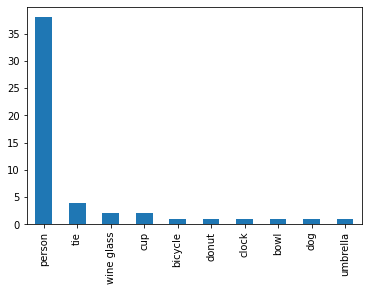

In [22]:
#produce a bar chart for object detection of negative memes
neg_df_res.label.value_counts().plot(kind='bar')

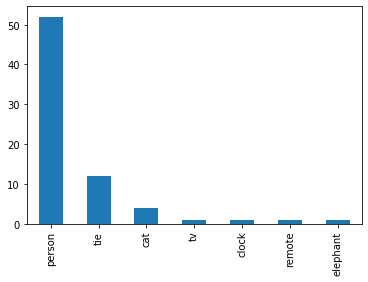

In [35]:
#produce a bar chart for object detection of neutral memes
neu_df_res.label.value_counts().plot(kind='bar')

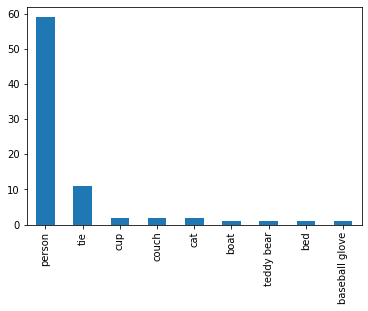

In [36]:
#produce a bar chart for object detection of positive memes
pos_df_res.label.value_counts().plot(kind='bar')

The three bar graphs demonstrate that the most frequent objects detected are "person". This can be explained as the most common internet memes consist of human portraits or figures. Animals like cats and dogs are also common content in memes.


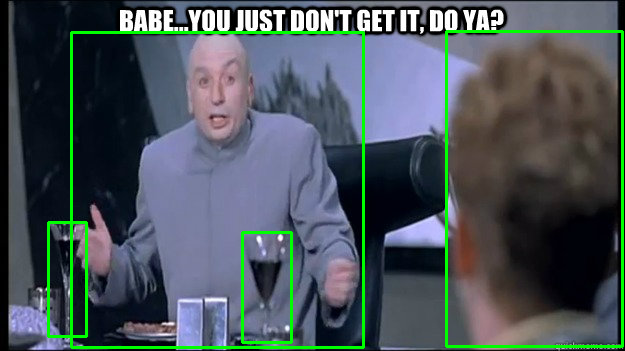

[{'score': 0.9990241527557373,
  'label': 'wine glass',
  'box': {'xmin': 242, 'ymin': 232, 'xmax': 291, 'ymax': 342}},
 {'score': 0.995256245136261,
  'label': 'person',
  'box': {'xmin': 446, 'ymin': 31, 'xmax': 622, 'ymax': 346}},
 {'score': 0.9993782043457031,
  'label': 'person',
  'box': {'xmin': 71, 'ymin': 32, 'xmax': 363, 'ymax': 347}},
 {'score': 0.9644070267677307,
  'label': 'wine glass',
  'box': {'xmin': 48, 'ymin': 222, 'xmax': 86, 'ymax': 336}}]

In [38]:
#Use opencv to visualize and draw the bounding box for the objects
import cv2

img = cv2.imread('negative_memes/image_0.jpg')
for index,row in neg_df_res[neg_df_res.image=="negative_memes/image_0.jpg"].iterrows():
  x1,y1,x2,y2 = list(row.box.values())
  cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

from google.colab.patches import cv2_imshow
cv2_imshow(img)

model("negative_memes/image_0.jpg")

# Discussions

In this project, I used easyOCR libraries to perform text detection and transformers model for object detection and analyze three categories of memes in a total number of 90 images. 

The easyOCR algorithms has demonstrated the effectiveness and precision in simple text detecting for images. The results can serve as a dataset for further sentiment analysis and comparison with human-labelled sentiments.

The transformers object detection model effectively identified "person" as the most frequent object element in the memes. The outcome is not surprising, but if we add more image data, we may obtain a more diverse range of results. One possible explanation of why "person" becomes the most common object in memes could be celebrity effect. For example, people created memes using the parodies of some political figures like Putin, Trump, and Obama. Famous people may bring more popularity and accelerate the spread of memes.

In terms of detecting emotions in memes, it is not sufficient to perform single model to identify the sentiments or humor types. Instead, it requires more complicated algorithms and language model training. At times, understanding a meme requires a textual context, which could be challenging for computers to identify.

#References
- Courtois, C., & Frissen, T. (2022). Computer Vision and Internet Meme Genealogy: An Evaluation of Image Feature Matching as a Technique for Pattern Detection. In Communication Methods and Measures (pp. 1–23). Informa UK Limited. https://doi.org/10.1080/19312458.2022.2122423
- Shifman, L. (2014). Memes in digital culture. MIT Press.
- Szeliski, R. (2010). Computer vision algorithms and applications. Springer Science & Business Media.
- Williams, S. et al. (2021). Memotion dataset 7k. Kaggle. https://www.kaggle.com/datasets/williamscott701/memotion-dataset-7k